# Week 1 - What is machine learning?

## Supervised vs. Unsupervised Machine Learning

### Supervised Learning

Algorithms that learn how to take an input and will produce an output
- learns from being trained on 'right answers'
- goal is to eventually give these 'right answers' on its own

Different applications of Supervised learning
- spam filtering (email => spam)
- speech recognition (audto => text transcripts)
- machine translation (English => Spanish)
- online advertising (ad, user info => click)
- self-driving car (image, radar info => position of other cars)
- visual inspection (image or phone => defect)

**Regression**
- Example: Housing prices vs square footage
- Plot square footage (x-axis) and housing prices (y-axis)
- The goal of regression is to find the 'best fit line' through the points to make the best prediction possible

**Classification**
- Example: breast cancer detection
- Plot size of tumor in cm (x-axis) vs diagnosis [0, 1] (y-axis) => there's a clear divide (choice is either 0 for benign or 1 for malignant)
- Can plot them on a number line using two different symbols
- Since countable number of possibilities, would be considered classification
- The goal is the find the 'boundary' to classify the types of breast cancer (categories)
- Output classes synonymous to output category

### Unsupervised Learning

Algorithms that find some interesting grouping in the data. Takes data without labels and tries to create its own labels/structure.

**Clustering**
- Example 1: Google news clustering
- Cluster news articles that have similar words together to find 'related articles'
 
- Example 2: DNA microarray
- Plot individuals (column) and genes (row)
- Can cluster individuals together by the similarlity of their genes
 
- Example 3: Grouping customers
- Use user data to find different segments in the market
 
**Anomaly Detection**
- Main goal is to find unusual data points

**Dimensionality reduction**
- Main goal is to compress data using fewer numbers

## Linear Regression Model Part 1

Common terminology:
- training set: the dataset you use to train the model
- $x$: input variable/feature
- $y$: target/output variable
- ($x, y$): single training example
- ($x^{(i)}, y^{(i)})$: $i^{th}$ training example

## Linear Regression Model Part 2

### General process for Supervised Learning
We start with a training set and we create a learning algorithm to build a model ($f$). We then use our test data set to have our model generate a prediction ($\hat{y}$).
<br>
<br>
The notation we would use to represent $f$ is:
$f_{w, b}(x) = wx + b$
<br>
<br>
Types of Regressions:
- Linear regression: with one (single feature $x$) variable
    - also known as univariate linear regression

## Lab 2 - Model Representation

### Tools
Common tools used in machine learning
- NumPy: popular library for scientific computing
- Matplotlib: popular library for visualizing data

### Step 1: General Data Set-Up

In [26]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use({PATH_TO_FILE}) <- optional styling for plots

# usually you use an array of data and split it into training and testing data
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([100, 200, 300, 400, 500])

# m is the number of training examples, in this case the length of x_train
m = len(x_train)
print(f"Number of training examples is: {m}")

# a training example is just one row or one datapoint of the training set, denoted by x_i and y_i
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

Number of training examples is: 5
(x^(0), y^(0)) = (1, 100)


### Step 2: Plotting the Training Data (if possible, to visualize best fit)

Example Plot


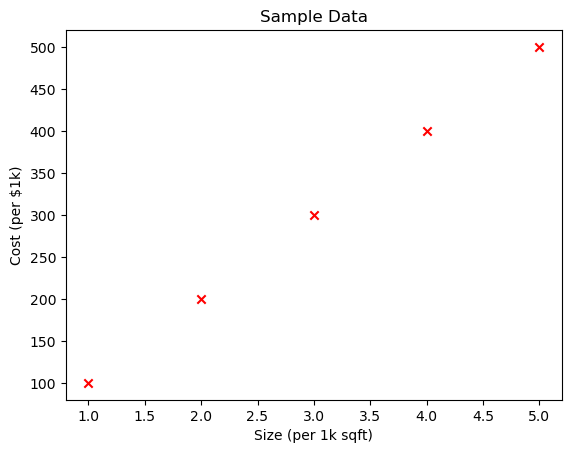

In [43]:
print('Example Plot')
# Plot the data points & customized color
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Sample Data') # title
plt.ylabel('Cost (per $1k)') # set y-axis label
plt.xlabel('Size (per 1k sqft)') # set x-axis label
plt.show()

### Summary Table of Notation for Regression

| General Notation | Description | Variables |
|:----:|:----|:----:|
|$x$|Feature values in Training Data | `x_train` | 
|$y$|Output values in Training Data | `y_train` |
|$x^{(i)}, y^{(i)}$ | $i_{th}$ Training Data point | `x_i, y_i` |
| $m$ | Size of Training Data | `m` |
| $w$ | regression parameter(coefficient): weight | `w` |
| $b$ | regression parameter(coefficient): bias | `b` |
| $f_{w, b}(x^{(i)})$ | The prediction of the model at $x^{(i)}$ with parameters $w, b$: $f_{w, b}(x^{(i)}) = wx^{(i)} + b$ | `f_wb` |

### Step 3: Create the Model Function & Validate

For this particular example, we can see from the plot above that the best fit regression would most likely be a straight line. So we can create a function that would calculate the prediction $\hat{y}$ based on our chosen/calculated $w, b$ values.

In [17]:
def calculate_prediction(x, w, b):
    """
    Calculates the output of model with parameters w and b
    Inputs: 
        x (ndarray (m,)): Data, size m
        w,b (scalar)    : model parameters
    Returns: 
        y (ndarray (m,)): target values
    """
    m = len(x)         # calculate size of data set
    f_wb = np.zeros(m) # initialize an empty array for output
    for i in range(m):
        f_wb[i] = w * x[i] + b # for each data point, fill in output array
    return f_wb

Now we can call the function with our choice of parameters $w,b$. We can calculate $w,b$ by getting the slope and y-intercept of a line that fits the points in the data set (by assuming all the points are on the line)  since we know that this will be a linear regression.
<br><br>
So then, $w,b$ can be calculated in the following:
<br><br>
Data points: `[(1, 100), (2,200), (3,300), (4,400), (5,500)]`
<br><br>
Slope, or $w$: $$ \frac{{y_{1} - y_{0}}}{{x_{1} - x_{0}}} = \frac{{200 - 100}}{{2 - 1}} = 100 $$
<br><br>
Y-intercept, or $b$: $$ y_{0} = wx_{0} + b $$
$$ \Rightarrow 100 = (100)*(1) + b $$
$$ \Rightarrow b = 0 $$
<br><br>
Now that we have both $w$ and $b$, we can use our `calculate_prediction` function.

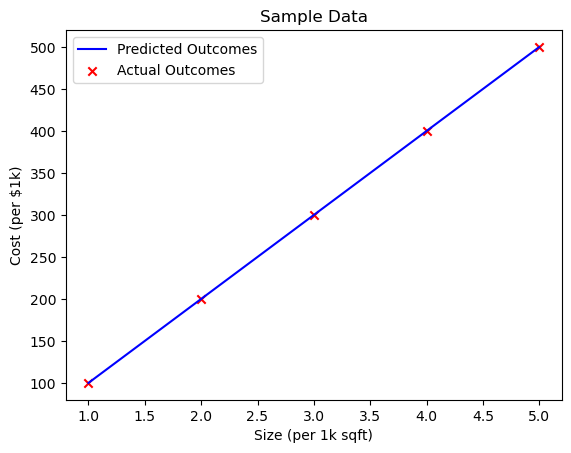

In [20]:
w = 100
b = 0
prediction_y = calculate_prediction(x_train, w, b)

plt.plot(x_train, prediction_y, c='b', label='Predicted Outcomes')
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Outcomes')
plt.title('Sample Data') # title
plt.ylabel('Cost (per $1k)') # set y-axis label
plt.xlabel('Size (per 1k sqft)') # set x-axis label
plt.legend()
plt.show()

### Step 5: Predict Outcomes with new data points using the model

Using the model created above, we can use it to predict outcomes for new data points. For example, for a feature value ($\hat{x}$) of 6, (i.e. $x = 6$), we would expect our outcome ($\hat{y}$) to be 600 using the model function.

$$ \hat{y} = 100{\hat{x}} + 0 $$
$$\Rightarrow \hat{y} = 100(6) + 0 = 600 $$

## Cost-Functions

### Why do we need them?
When we use real-world data, it is almost impossible to find a perfect-fit for any regression. But our goal is to get a best fit regression that limits the amount of deviance from our data set. For example, in the plot above, all five points are on the line perfectly. But what if some of the points were above or below the line? The cost function will help us determine the best fit regression for those situations.
<br>
<br>
The cost function (squared error cost function) is expressed as follows:
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m \left(\hat{y}^{(i)} - y^{(i)}\right)^2 $$
Since we know $\hat{y}$ is the output of $f_{w,b}$ at $x^{(i)}$, we can replace $\hat{y}$ below:
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)^2 $$
Simply put, it is the average of the squared differences between the predicted and actual values. It may appear familiar since this equation looks very simimilar to is also the way we would calculate variance from the mean of a data set. 
<br>
<br>
This footnote in this link gives a great intuition of why we square the difference: [https://www.mathsisfun.com/data/standard-deviation.html#WhySquare](https://www.mathsisfun.com/data/standard-deviation.html#WhySquare)
<br>
<br>
Now using this equation, our goal is to find the best fit linear regression, which means we want to minimize our cost $J(w,b)$ as much as possible.

In [21]:
def get_cost_value(x, y, w, b):
    """
    Computes the cost function (for linear regression)
    Inputs:
        x (ndarray (m, )): Data Set with m examples
        y (ndarray (m, )): Labels for inputs
        w,b (scalar)     : model parameters
    Returns
        total cost (float): The cost/error of using w,b as the parameters for the linear regression f 
    """
    
    # size of training data
    m = len(x)
    
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum
    
    return total_cost

## Gradient Descent

### The Details

So how do we calculate the cost function of a regression that is non-linear? For this case we use the algorithm called `gradient descent`.
<br><br>
Imagine a mapping of $J(w,b)$ that is 3D (kind of like a topographical map). The goal is to find the local minima of the map because that is where the cost will be lowest.
<br><br>
The algorithm is as follows:
$$ w = w - \alpha \frac{\partial}{\partial w}J\left(w, b\right) $$
$$ b = b - \alpha \frac{\partial}{\partial b}J\left(w, b\right) $$
where $\alpha$ is the `learning rate`, which is usually a small number between $[0,1]$. It is the **size of the step** you take downhill in the `gradient descent algorithm`. The portion that comes after the $\alpha$ is called the `derivative`. This determines the **direction** that the step is going towards.
You want to continue updating $w$ and $b$ until the movement between each step is minimal.

### Learning Rate
In order to calculate an accurate minimal cost $J(w, b)$, we need to be careful with how we choose the learning rate, $\alpha$. 
<br>
<br>
If $\alpha$ is too small...
- it will take a long time/a lot of steps to find the minimum
- gradient descent may be slow

If $\alpha$ is too large...
- gradient descent may overshoot and never reach the minimum
- it could never converge and diverse instead.

As we approach a local minimum, the local derivative will become smaller, which means that our update steps also become smaller. Because of this, we do not need to adjust our $\alpha$ - we simply keep it constant.

### Putting it all together
For our linear regression model
$$ f_{w, b}(x) = wx + b $$
Our cost function is
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)^2 $$
We can then write our Gradient Descent Algorithm that we repeat until convergence as:
$$ w = w - \alpha \frac{\partial}{\partial w}J\left(w, b\right) = \frac{1}{m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)x^{(i)} $$
$$ b = b - \alpha \frac{\partial}{\partial b}J\left(w, b\right) = \frac{1}{m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)}) - y^{(i)}\right) $$
<br><br>
The derivation of $\frac{\partial}{\partial w}J\left(w, b\right)$ is as follows:
$$ \frac{\partial}{\partial w}J\left(w, b\right) = \frac{\partial}{\partial w}\frac{1}{2m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)^2 $$
Since 
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

$$ 
\begin{align*}
\frac{\partial}{\partial \color{red}{w}}J\left(w, b\right) &= \frac{\partial}{\partial \color{red}w}\frac{1}{2m} \sum_{i=1}^m \left(\color{red}{w}x^{(i)} + b - y^{(i)}\right)^2\\
&= \frac{1}{\color{blue}2m} \sum_{i=1}^m \color{blue}2x^{(i)}\left(wx^{(i)} + b - y^{(i)}\right) \\
&= \frac{1}{m} \sum_{i=1}^m x^{(i)}\left(wx^{(i)} + b - y^{(i)}\right) \\
&= \frac{1}{m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)x^{(i)}
\end{align*}
$$

The derivation of $\frac{\partial}{\partial b}J\left(w, b\right)$ is as follows:
$$ \frac{\partial}{\partial b}J\left(w, b\right) = \frac{\partial}{\partial b}\frac{1}{2m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)^2 $$
Since 
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \\ $$
$$ 
\begin{align*}
\frac{\partial}{\partial \color{red}b}J\left(w, b\right) &= \frac{\partial}{\partial \color{red}b}\frac{1}{2m} \sum_{i=1}^m \left(wx^{(i)} + \color{red}{b} - y^{(i)}\right)^2\\
&= \frac{1}{\color{blue}{2}m} \sum_{i=1}^m \color{blue}2\left(wx^{(i)} + b - y^{(i)}\right) \\
&= \frac{1}{m} \sum_{i=1}^m \left(wx^{(i)} + b - y^{(i)}\right) \\
&= \frac{1}{m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)
\end{align*}
$$

#### Batch gradient descent
Batch gradient descent is when each step of the descent uses all the training examples

### Implementing Gradient Descent
Using the equations from above, we want to implement the gradient descent algorithm for one feature. To do this, we will use three functions.
- `compute_gradient` which implements the two derivations above
- `get_cost_value` which implements the cost function
- `gradient_descent` which puts together `compute_gradient` and `get_cost_value`


In [22]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Inputs:
        x(ndarray (m, )): Data, m examples
        y(ndarray (m, )): target values
        w,b (scalar)    : model parameters
    Returns:
        dj_dw (scalar): The gradient dJ(w,b)/dw
        dj_db (scalar): The gradient dJ(w,b)/db
    """
    
    m = len(x)
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]  # inside the parens for gradient equation dJ(w,b)/dw
        dj_db_i = (f_wb - y[i])         # inside the parens for gradient equation dJ(w,b)/db
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [40]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, get_cost_value, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha.
    
    Inputs:
        x(ndarray (m, ))  : Data, m examples
        y(ndarray (m, ))  : target values
        w_in,b_in (scalar): initial values of model parameters
        alpha (float)     : learning rate
        num_iters (int)   : number of iterations to run gradient descent
        get_cost_value    : function to calculate cost
        gradient_function : function to calculate gradient
        
    Returns:
        w (scalar)  : new w value after running gradient descent
        b (scalar)  : new b value after running gradient descent
        J_history (List): History of cost values
        p_history (List): History of parameters [w,b]
    """
    
    J_history = [] # initializing empty array to store cost values
    p_history = [] # initializing empty array to store parameters
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Step 1: calculate the gradient and update params using gradient function
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        # Step 2: Update params with calculated gradient
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        # Step 3: Save cost and params at each iteration
        if i < 100000:      # prevent resource exhaustion 
            J_history.append(get_cost_value(x, y, w , b))
            p_history.append([w,b])
        # Step 4: Print cost every 10 iterations
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
        
    return w, b, J_history, p_history

In [41]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, get_cost_value, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final: 8.4f}, {b_final: 8.4f})")

Iteration    0: Cost 4.28e+04  dj_dw: -1.100e+03, dj_db: -3.000e+02   w:  1.100e+01, b: 3.00000e+00
Iteration 1000: Cost 2.04e+00  dj_dw: -2.218e-01, dj_db:  8.009e-01   w:  9.869e+01, b: 4.72965e+00
Iteration 2000: Cost 6.91e-02  dj_dw: -4.085e-02, dj_db:  1.475e-01   w:  9.976e+01, b: 8.71046e-01
Iteration 3000: Cost 2.34e-03  dj_dw: -7.524e-03, dj_db:  2.716e-02   w:  9.996e+01, b: 1.60418e-01
Iteration 4000: Cost 7.94e-05  dj_dw: -1.386e-03, dj_db:  5.003e-03   w:  9.999e+01, b: 2.95438e-02
Iteration 5000: Cost 2.69e-06  dj_dw: -2.552e-04, dj_db:  9.213e-04   w:  1.000e+02, b: 5.44099e-03
Iteration 6000: Cost 9.14e-08  dj_dw: -4.700e-05, dj_db:  1.697e-04   w:  1.000e+02, b: 1.00205e-03
Iteration 7000: Cost 3.10e-09  dj_dw: -8.656e-06, dj_db:  3.125e-05   w:  1.000e+02, b: 1.84545e-04
Iteration 8000: Cost 1.05e-10  dj_dw: -1.594e-06, dj_db:  5.755e-06   w:  1.000e+02, b: 3.39871e-05
Iteration 9000: Cost 3.57e-12  dj_dw: -2.936e-07, dj_db:  1.060e-06   w:  1.000e+02, b: 6.25931e-06


### Plotting Cost vs Iteration
In order to get a better picture of what this gradient descent process is doing, it is sometimes good to plot the history we store in the function. From the shape of the plots, we can see that in the beginning ~100 steps, there is a rapid decline in cost and then towards the end ~8000 steps, the cost decline becomes much smaller.

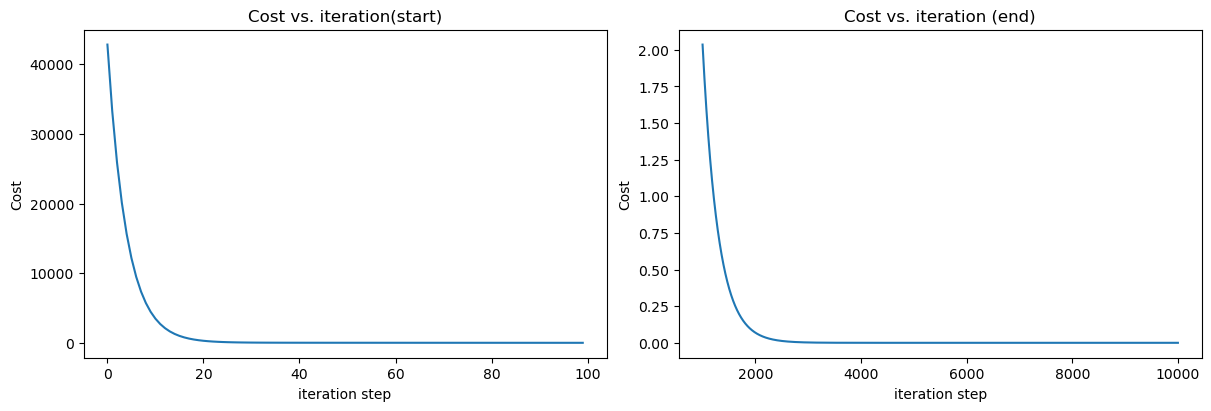

In [42]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### Predicting

Now that we have found our $w, b$ values through running our gradient descent, we can use it to predict future values. If you recall (way up above), our sample example had 5 data points. When doing the math manually, we figured that for a $\hat{x}$ value of 6, we expected an output $\hat{y}$ of 600. We can use our $w,b$ values to calculate whether the values we got through gradient descent is correct:

In [44]:
print(f"6 prediction {w_final*6 + b_final:0.1f}")
print(f"7 prediction {w_final*7 + b_final:0.1f}")
print(f"8 prediction {w_final*8 + b_final:0.1f}")

6 prediction 600.0
7 prediction 700.0
8 prediction 800.0
